# Air Quality Forecasting using Time Series Machine Learning Models

## Notebook 1: Data Cleaning

## 1.0. Introduction
### 1.1. Project Goal
The goal of this project is to develop a machine learning model that predicts future air quality levels based on historical air quality data and relevant environmental factors.
### 1.2. Context/ Problem Statement
A few years ago, China established the Air Quality Index (AQI) based on the level of five pollutants atmospheres, namely sulfur dioxide (SO2), nitrogen dioxide (NO2), particulate matter (PM10), carbon monoxide (CO) and ozone (O3) measured at the monitoring stations in each city.

## 2.0. Installing & Importing Libraries

In [1]:
# Installing liac-arff library
# The library is for loading the dataset which is in the ARFF format:
# !pip install liac-arff

In [1]:
# Import the ARFF library
import arff  # If using the 'liac-arff' package (install via `pip install liac-arff`)

# Libraries required for data analysis, visualization, and preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

import math  # For mathematical operations

## 3.0. Importing Data

In [2]:
# data obtained from https://www.openml.org/search?type=data&status=active&id=42933&sort=runs
# Load ARFF file
with open('dataset.arff', 'r') as file:
    data = arff.load(file)

# Extract data and attribute names
attributes = [attr[0] for attr in data['attributes']]
air_poll = pd.DataFrame(data['data'], columns=attributes)

# Display the DataFrame
print(air_poll.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [3]:
air_poll.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [4]:
air_poll.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
air_poll.info() #get dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [6]:
station_nunique = air_poll['station'].nunique()
print(f"number of unique categories for station column:\n {station_nunique}")

number of unique categories for station column:
 12


In [8]:
air_poll['station'].unique()
# check unique values for wd feature
station_unique_values= air_poll['station'].unique()
print(f"Unique categories for station column:\n {station_unique_values}")

Unique categories for station column:
 ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


### Description of the data contained in the columns
- The dataset consists of 420,768 observations and 18 columns. 
- There are 6 target variables, namely:
  - PM2.5: Fine particulate matter. Defined as particles that are 2.5 microns or less in diameter.
  - PM10: Coarse particulate matter. Defined as particles that are 10 microns or less in diameter.
  - S02: Sulfur dioxide levels.
  - NO2: nitrogen dioxide levels.
  - CO: Carbon Monoxide levels.
  - 03: Ozone.
- There are 8 environmental factors namely:
   - TEMP: Temperature in degrees celsius
  - PRES: Pressure
  - DEWP: Dew Point in degrees celsius
  - RAIN: Rain in 
  - wd: wind direction 
  - WSPM: wind speed
- There are 4 columns containing time features, namely:
  - year
  - month
  - day
  - hour 
- The last column; station contains the names of the monitoring stations in Beijing where the air pollutant measurements were collected
- There are 12 monitoring stations where data was collected, namely:
  1. Aotizhongxin
  2. Changping
  3. Dingling
  4. Dongsi
  5. Guanyuan
  6. Gucheng
  7. Huairou
  8. Nongzhanguan
  9. Shunyi
  10. Tiantan
  11. Wanliu
  12. Wanshouxigong

In [9]:
# create a copy of the original dataframe to ensure data integrity and prevent unintentional modifications.
air_poll_copy = air_poll.copy()

In [10]:
column_names = air_poll.columns
print(f" Column names \n {column_names} ")

 Column names 
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object') 


In [11]:
numerical_cols = air_poll.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = len(numerical_cols)
print(f"Numerical columns: {numerical_cols}")
print(f"Number of numerical columns: {numerical_cols}")

Numerical columns: 16
Number of numerical columns: 16


In [12]:
categorical_cols = air_poll.select_dtypes(include=['object']).columns.tolist()
num_categorical_cols = len(categorical_cols)
print(f"Categorical columns: {categorical_cols}")
print(f"Number of categorical columns: {num_categorical_cols}")

Categorical columns: ['wd', 'station']
Number of categorical columns: 2


In [13]:
# check number of unique values for wd column that contains categorical data.
wd_nunique_values = air_poll['wd'].nunique()
print(f"Number of unique categories for wd column: {wd_nunique_values}")

Number of unique categories for wd column: 16


In [15]:
# check unique values for wd feature
wd_unique_values= air_poll['wd'].unique()
print(f"Unique categories for wd column:\n {wd_unique_values}")

Unique categories for wd column:
 ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' None]


## 4.0 Creating dictionaries for datasubsets per weather station

**The time series data is for 12 monitoring stations. For ease of forecasting, modeling will be done per station.**

In [16]:
# Group data by station and get data for the first station; Aotizhongxin
dfs_by_station = {station: data for station, data in air_poll.groupby('station')}

first_station_name = list(dfs_by_station.keys())[0]  # Get the first station name

first_station_df = dfs_by_station[first_station_name].copy() # Copy the first station's DataFrame

first_station_df.drop('station', axis=1, inplace=True) # drop the station column as it's not required. 

In [17]:
# check information for the dataset for the first station
print(f"Data for the first station: {first_station_name}")
first_station_df.info() 

Data for the first station: Aotizhongxin
<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   34139 non-null  float64
 6   PM10    34346 non-null  float64
 7   SO2     34129 non-null  float64
 8   NO2     34041 non-null  float64
 9   CO      33288 non-null  float64
 10  O3      33345 non-null  float64
 11  TEMP    35044 non-null  float64
 12  PRES    35044 non-null  float64
 13  DEWP    35044 non-null  float64
 14  RAIN    35044 non-null  float64
 15  wd      34983 non-null  object 
 16  WSPM    35050 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.8+ MB


In [18]:
first_station_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [19]:
first_station_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3


The data subset for Aotizhongxin station has 35,064 rows and 17 columns.

## 5.0. Data Preprocessing

### 5.1. Missingness

In [20]:
# Check for missing values
missing_percentage = first_station_df.isnull().mean() * 100
print(f"Missing percentage of {first_station_name} data \n{missing_percentage}")

Missing percentage of Aotizhongxin data 
No       0.000000
year     0.000000
month    0.000000
day      0.000000
hour     0.000000
PM2.5    2.638033
PM10     2.047684
SO2      2.666553
NO2      2.917522
CO       5.065024
O3       4.902464
TEMP     0.057039
PRES     0.057039
DEWP     0.057039
RAIN     0.057039
wd       0.231006
WSPM     0.039927
dtype: float64


12 features have missing vlues

In [21]:
# Check number of missing values per column
missing_percentage = first_station_df.isnull().sum()
print(f"Missing values per column for {first_station_name} data \n{missing_percentage} ")

Missing values per column for Aotizhongxin data 
No          0
year        0
month       0
day         0
hour        0
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64 


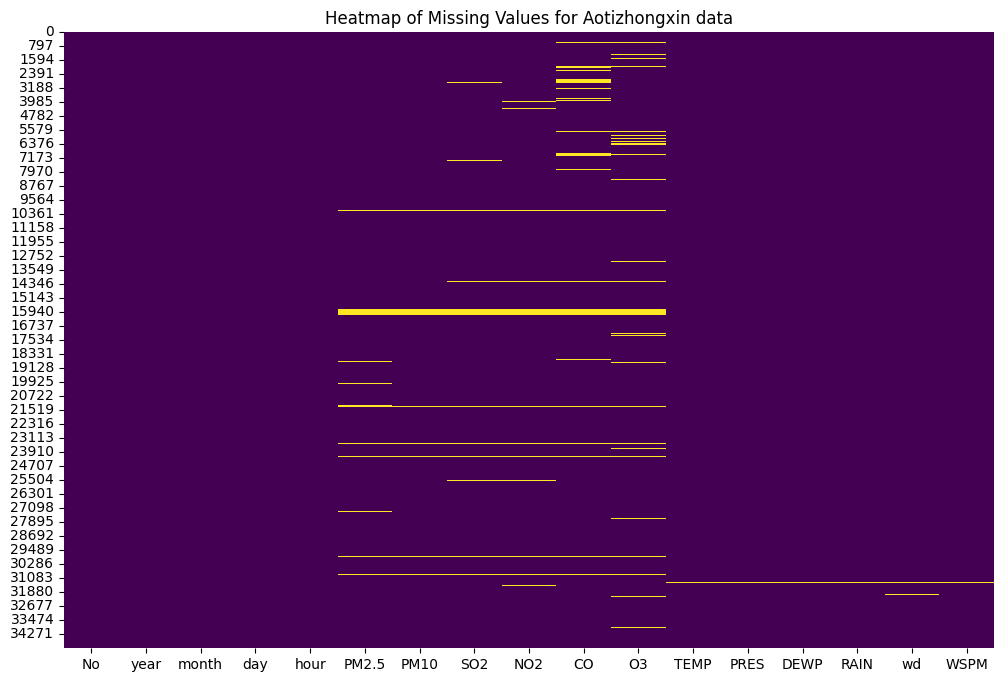

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(first_station_df.isnull(), cbar=False, cmap='viridis')
plt.title(f"Heatmap of Missing Values for {first_station_name} data")
plt.show()

There are missing values for all features except NO, YEAR, MONTH, DAY & HOUR features.

### 5.2. Handling missingness

In [23]:
# Handle Missing Values using forward fill (ffill) and backward fill (bfill)
first_station_df = first_station_df.ffill().bfill()  # Apply ffill first, then bfill

# confirm missing values have been filled. 
missing_percentage = first_station_df.isnull().mean() * 100
print(f"Missing percentage of {first_station_name} data \n{missing_percentage} ")

Missing percentage of Aotizhongxin data 
No       0.0
year     0.0
month    0.0
day      0.0
hour     0.0
PM2.5    0.0
PM10     0.0
SO2      0.0
NO2      0.0
CO       0.0
O3       0.0
TEMP     0.0
PRES     0.0
DEWP     0.0
RAIN     0.0
wd       0.0
WSPM     0.0
dtype: float64 


### 5.3. Check for duplicate rows

In [24]:
# check for duplicate rows
duplicate_rows = first_station_df[first_station_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print(f"No duplicate rows found for {first_station_name} data")

Number of duplicate rows: 0
No duplicate rows found for Aotizhongxin data


### 5.4. Converting columns to date time & indexing of datetime columns

In [25]:
# Convert year, month, day, hour to datetime
first_station_df['datetime'] = pd.to_datetime(first_station_df[['year', 'month', 'day', 'hour']])

# Set 'datetime' as index
first_station_indexed = first_station_df.set_index('datetime')

In [26]:
first_station_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   35064 non-null  float64
 6   PM10    35064 non-null  float64
 7   SO2     35064 non-null  float64
 8   NO2     35064 non-null  float64
 9   CO      35064 non-null  float64
 10  O3      35064 non-null  float64
 11  TEMP    35064 non-null  float64
 12  PRES    35064 non-null  float64
 13  DEWP    35064 non-null  float64
 14  RAIN    35064 non-null  float64
 15  wd      35064 non-null  object 
 16  WSPM    35064 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.8+ MB


### 5.5 Add a feature for wind direction categories in degrees

In [27]:
# Define mapping for wind direction to degrees
wind_direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Create a 'wd_direction with numerical values
first_station_indexed['wd_direction'] = first_station_indexed['wd'].map(wind_direction_map)

# confirm conversion
first_station_indexed.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,wd_direction
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,337.5
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,0.0
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,337.5
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,315.0
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,0.0
2013-03-01 05:00:00,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,0.0
2013-03-01 06:00:00,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,22.5
2013-03-01 07:00:00,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,337.5
2013-03-01 08:00:00,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,337.5


### 5.6 Set frequency of data to change it to timeseries data

In [28]:
# set the correct frequency
first_station_indexed = first_station_indexed.asfreq('h')  # set hourly frequency

# confirm setting of frequency
first_station_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            35064 non-null  int64  
 1   year          35064 non-null  int64  
 2   month         35064 non-null  int64  
 3   day           35064 non-null  int64  
 4   hour          35064 non-null  int64  
 5   PM2.5         35064 non-null  float64
 6   PM10          35064 non-null  float64
 7   SO2           35064 non-null  float64
 8   NO2           35064 non-null  float64
 9   CO            35064 non-null  float64
 10  O3            35064 non-null  float64
 11  TEMP          35064 non-null  float64
 12  PRES          35064 non-null  float64
 13  DEWP          35064 non-null  float64
 14  RAIN          35064 non-null  float64
 15  wd            35064 non-null  object 
 16  WSPM          35064 non-null  float64
 17  wd_direction  35064 non-nu

### 5.7 Dropping unnecessary columns from the first stations data subset

In [29]:
# Drop unnecessary columns
columns_to_drop = ["No"]
cleaned_first_station_df = first_station_indexed.drop(columns=columns_to_drop, inplace=False)

# Print summary of cleaned data
print("\n--- Processed Data Info ---")
print(cleaned_first_station_df.info())


--- Processed Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          35064 non-null  int64  
 1   month         35064 non-null  int64  
 2   day           35064 non-null  int64  
 3   hour          35064 non-null  int64  
 4   PM2.5         35064 non-null  float64
 5   PM10          35064 non-null  float64
 6   SO2           35064 non-null  float64
 7   NO2           35064 non-null  float64
 8   CO            35064 non-null  float64
 9   O3            35064 non-null  float64
 10  TEMP          35064 non-null  float64
 11  PRES          35064 non-null  float64
 12  DEWP          35064 non-null  float64
 13  RAIN          35064 non-null  float64
 14  wd            35064 non-null  object 
 15  WSPM          35064 non-null  float64
 16  wd_direction  35064 non-null  float64
dt

In [30]:
print(cleaned_first_station_df.head())

                     year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
datetime                                                                      
2013-03-01 00:00:00  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
2013-03-01 01:00:00  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2013-03-01 02:00:00  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  wd_direction  
datetime                                                                      
2013-03-01 00:00:00  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4         337.5  
2013-03-01 01:00:00  77.0  -1.1  1023.2 -18.2   0.0    N   4.7           0.0  
2013-03-01 02:00:00  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6         337.5  
2013-03-01 03:00:00  72.0  -1.4  1024.5 -19.4   0.0

17 features for EDA

## 6.0 Saving cleaned and pre-processed dataframe as csv file

In [32]:
# save the  cleaned data frame as a csv file for EDA.
cleaned_first_station_df.to_csv('Aotizhongxin_clean_data.csv', index=True)